калибровка

Коэффициент k = 7.079590e-02
Свободный член b = -5.432137e-02


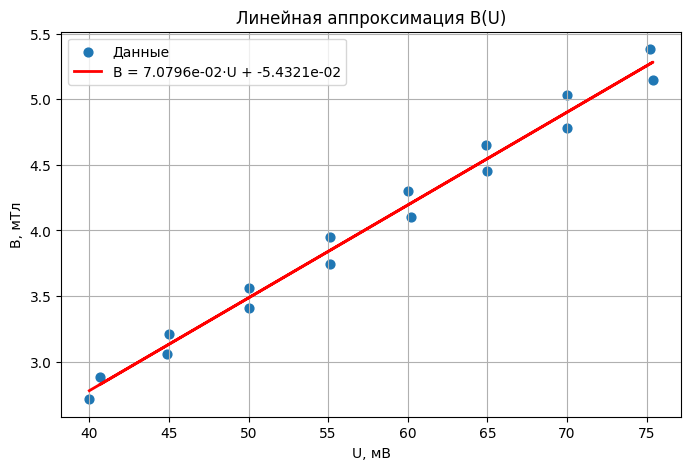

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import csv

# Константы
N = 49
nu = 50  # Гц
d = 0.0146  # м (14.6 мм)
S = np.pi * d**2 / 4  # площадь сечения

U = []
U_meas = []
B = []

# Чтение CSV
with open('data/exp_2.csv', newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # пропускаем заголовок
    for row in reader:
        if len(row) < 2 or row[0] == '' or row[1] == '':
            continue
        try:
            U_val = float(row[0])
            U_izm = float(row[1])

            U.append(U_val)
            U_meas.append(U_izm)

            # Формула B(T)
            B_val = U_izm / (2 * np.pi * nu * N * S)
            B.append(B_val)

        except ValueError:
            continue

U = np.array(U)
B = np.array(B)

# --- Линейная аппроксимация B = kU + b ---
k, b = np.polyfit(U, B, 1)
B_fit = k * U + b

# Вывод коэффициентов
print(f"Коэффициент k = {k:.6e}")
print(f"Свободный член b = {b:.6e}")

# График
plt.figure(figsize=(8,5))
plt.scatter(U, B, label='Данные', s=40)
plt.plot(U, B_fit, 'r', label=f'B = {k:.4e}·U + {b:.4e}', linewidth=2)  # красная линия

plt.xlabel('U, мВ')
plt.ylabel('B, мТл')
plt.title('Линейная аппроксимация B(U)')
plt.grid(True)
plt.legend()
plt.show()


Experiment 1

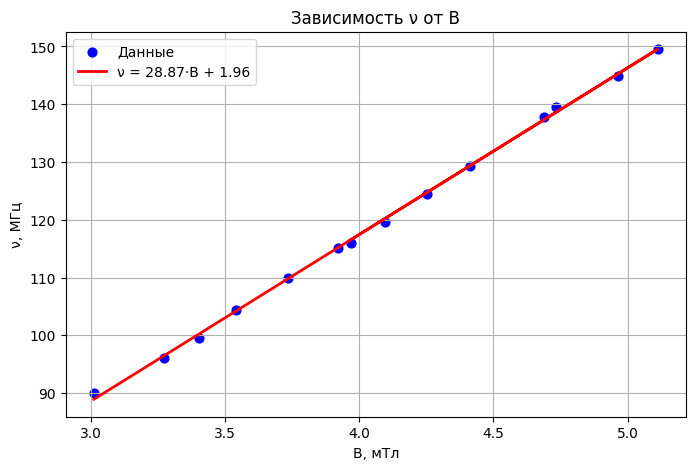

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import csv

# --- Чтение CSV с nu и U ---
nu_list = []
B_list = []

with open('data/exp_1.csv', newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # пропускаем заголовок
    for row in reader:
        if len(row) < 2 or row[0] == '' or row[1] == '':
            continue
        try:
            nu_val = float(row[0])
            U_val = float(row[1])

            # Вычисляем B по аппроксимации
            B_val = k * U_val + b

            nu_list.append(nu_val)
            B_list.append(B_val)

        except ValueError:
            continue

nu_array = np.array(nu_list)
B_array = np.array(B_list)

# --- Линейная аппроксимация nu(B) ---
p = np.polyfit(B_array, nu_array, 1)
nu_fit = np.polyval(p, B_array)

# --- График nu(B) ---
plt.figure(figsize=(8,5))
plt.scatter(B_array, nu_array, color='blue', s=40, label='Данные')
plt.plot(B_array, nu_fit, 'r', linewidth=2, label=f'ν = {p[0]:.2f}·B + {p[1]:.2f}')
plt.xlabel('B, мТл')
plt.ylabel('ν, МГц')
plt.title('Зависимость ν от B')
plt.grid(True)
plt.legend()
plt.show()


In [24]:
import numpy as np
import csv

# Предполагаем, что k и b уже определены в блокноте из аппроксимации

B_left = []
B_right = []

# Чтение CSV
with open('data/exp_1.csv', newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        try:
            U_left = float(row['U-left'])
            U_right = float(row['U-right'])

            # Вычисляем B через аппроксимацию
            B_l = k * U_left + b
            B_r = k * U_right + b

            B_left.append(B_l)
            B_right.append(B_r)

        except (ValueError, KeyError):
            continue

B_left = np.array(B_left)
B_right = np.array(B_right)

# Вычисляем k_osc
k_osc_values = np.abs(B_left - B_right) / 2
k_osc = np.mean(k_osc_values)

print(f"Значение k_osc = {k_osc:.6e} Тл")


Значение k_osc = 2.971405e-01 Тл
